In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [59]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [60]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [61]:
y.shape

(70000,)

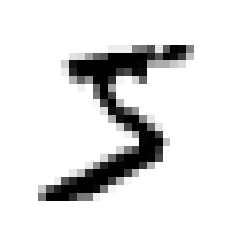

In [62]:
first_digit = X[0]
first_digit_image = first_digit.reshape(28, 28)
plt.imshow(first_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [0]:
y = y.astype(np.uint8)

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [0]:
# For binary classification: 5 vs Not 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [65]:
# Linear support vector machine (SVM) using Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train_5)
sgd.predict([first_digit])

array([ True])

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [0]:
cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [0]:
y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

In [67]:
from sklearn.metrics import confusion_matrix

# Rows: represent true labels
# Columns: represent predicted labels
print("[True Negative,   False Positive]\n[False Negative,  True Positive]\n")
C = confusion_matrix(y_train_5, y_train_pred)
C

[True Negative,   False Positive]
[False Negative,  True Positive]



array([[53892,   687],
       [ 1891,  3530]])

In [0]:
# Accuracy may not be a good measure for performance in binary classification
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)
  

all_negative_clf = Never5Classifier()
cross_val_score(all_negative_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [0]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [0]:
# Precision = TP/(TP+FP)
C[1][1] / (C[0][1] + C[1][1])

0.8370879772350012

In [0]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [0]:
# Recall = TP/(TP+FN)
C[1][1] / (C[1][0] + C[1][1])

0.6511713705958311

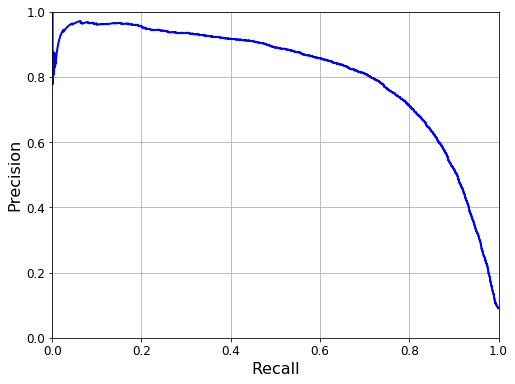

In [0]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

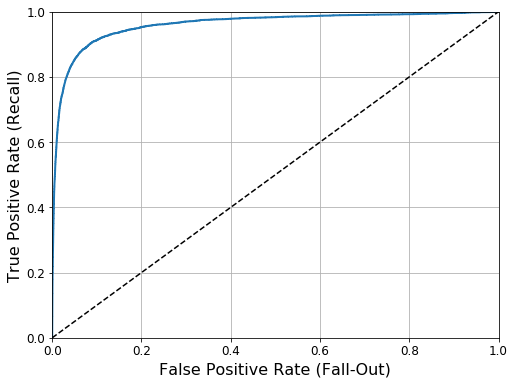

In [0]:
from sklearn.metrics import roc_curve

# TPR = recall
# FPR = FP/(FP+TN) = Fall-Out
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
y_probas = cross_val_predict(rfc, X_train, y_train_5, cv=3,
                             method="predict_proba")

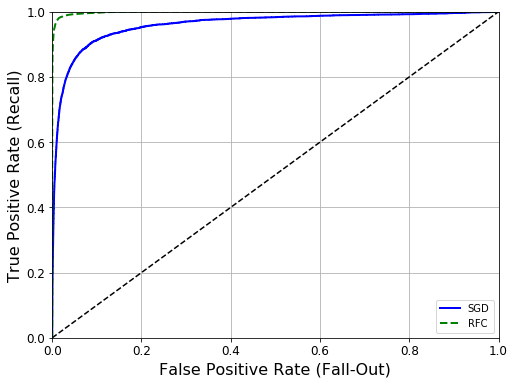

In [83]:
y_scores_rfc = y_probas[:, 1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_train_5, y_scores_rfc)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
plt.plot(fpr, tpr, 'b-', linewidth=2, label='SGD')
plt.plot(fpr_rfc, tpr_rfc, 'g--', linewidth=2, label='RFC')
plt.legend()
plt.show()

In [0]:
# Multiclass classification
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5

first_digit_scores = svm_clf.decision_function([first_digit])

In [0]:
first_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [0]:
np.argmax(first_digit_scores)

5

In [0]:
svm_clf.predict([first_digit])

array([5], dtype=uint8)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [0]:
y_train_pred = cross_val_predict(sgd, X_train_scaled, y_train, cv=3)

In [72]:
C = confusion_matrix(y_train, y_train_pred)
C

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [0]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

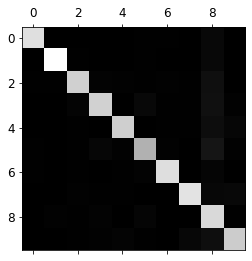

In [77]:
plt.matshow(C, cmap=plt.cm.gray)
plt.show()